In [10]:
from pycalphad import Database, variables as v
from espei.datasets import recursive_glob, load_datasets
from espei.plot import dataplot
from tinydb import where, Query
import matplotlib.pyplot as plt
from tinydb.operations import delete

['BCC_A2', 'LIQUID', 'SIGMA', 'FCC_A1']
['SIGMA', 'BCC_A2']
['FCC_A1', 'BCC_A2']
['LIQUID', 'BCC_A2']
value= ['(CR,FE)', ['FE'], [1.0]]
['BCC_A2', 'FCC_A1']
['BCC_A2', 'FCC_A1']
['BCC_A2', 'FCC_A1']
['BCC_A2', 'LIQUID']
['BCC_A2', 'LIQUID']
['LIQUID', 'BCC_A2']
['BCC_A2', 'SIGMA']
['BCC_A2', 'SIGMA']
['BCC_A2', 'BCC_A2']
['BCC_A2', 'SIGMA']
['BCC_A2', 'LIQUID', 'SIGMA', 'FCC_A1']


<AxesSubplot:title={'center':'Cr-Fe'}, xlabel='X(FE)', ylabel='Temperature (K)'>

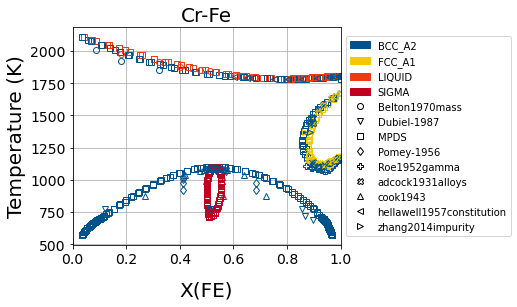

In [29]:
dbf = Database('Cr-Fe-phase-new.TDB')
comps = ['CR', 'FE','VA']
#phases = list(dbf.phases.keys())
#print(phases)
conds = {v.N: 1.0, v.P: 101325, v.T: (300, 4000, 20), v.X('FE'): (0, 1, 0.02)}
datasets = load_datasets(recursive_glob('.','*.json'))
#print(datasets.all())
datasets.update({'reference':'MPDS'},Query().reference.search('C9'))
datasets.update(delete,(Query().values.search("['(CR,FE)', ['FE'], [1.0]]")))
for records in datasets:
    '''
    if records['reference']!='MPDS':
        records['phases']=['EXP']
        print('S=',records)
        for i in range(len(records['values'])):
            print('N=',records['values'][i])
            for j in range(len(records['values'][i])):
                records['values'][i][j][0] = 'EXP
        print('Y=',records)
    '''
    a=records['phases']
    records['phases']=['BCC_A2' if o=='(CR,FE)' else o for o in records['phases']]
    records['phases']=['LIQUID' if o=='L' else o for o in records['phases']]
    records['phases']=['SIGMA' if o=='CR0.5FE0.5_136_TP30' else o for o in records['phases']]
    records['phases']=['FCC_A1' if o=='(FE,NI)' else o for o in records['phases']]
    records['phases']=['FCC_A1' if o=='FE,NI_225_CF4' else o for o in records['phases']]
    records['phases']=['BCC_A2' if o=='(NB6.33FE6.67,NB7NI6)' else o for o in records['phases']]
    datasets.update({'phases':records['phases']},where('phases')==a)
    print(records['phases'])
    for i in range(len(records['values'])):
        for j in range(len(records['values'][i])):
            
            if [1.0] in records['values'][i][j] or [0.0] in records['values'][i][j]:
                print('value=',records['values'][i][j])
            records['values'][i][j] = ['BCC_A2' if o=='(CR,FE)' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LIQUID' if o=='L' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['SIGMA' if o=='CR0.5FE0.5_136_TP30' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['FCC_A1' if o=='(FE,NI)' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['FCC_A1' if o=='FE,NI_225_CF4' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['BCC_A2' if o=='(NB6.33FE6.67,NB7NI6)' else o for o in records['values'][i][j]]
phases_1 = [r['phases'] for r in datasets]
phases_db = []
for i in phases_1:
    for j in i:
        if j not in phases_db:
            phases_db.append(j)
#phases_db.append('EXP')
print(phases_db)
dataplot(comps, phases_db, conds,datasets,tielines=False)
#plt.ylim(1750,1800)
#plt.xlim(0,0.1)